In [27]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import solve
import pandas as pd

In [2]:
def get_w(X,y):
    w = ((np.linalg.inv((np.transpose(X).dot(X))).dot(np.transpose(X))).dot(y))
    return w

In [254]:
def det_MSE(X,w,y):
    y = np.matrix(y)
    w = w.T
    y = y.T
    m, n = X.shape
    MSE = 1.0/m * (np.transpose(X.dot(w)-y)).dot(X.dot(w)-y)

    return MSE.item(0)

In [354]:
def plot_feature(w, range_min=0, range_max=5):
    degree = w.shape[1]
    x = np.linspace(range_min, range_max,100)
    x.reshape(100,1)
    y = 0
    for i in range(0, 2):
        y = y + w.item(1)*x + w.item(0)
    
    plt.plot(x ,y,'-')
    

## Baseline Vs full Linear regression

In [326]:
def train_test_split(train_data, test_data, feature_cols, target_col):
    
    X_train = np.ones((len(train_data), 1))
    X_train = np.append(train_data[:, feature_cols], X_train, axis=1) 
    y_train = train_data[:, target_col]
    
    X_test = np.ones((len(test_data), 1))
    X_test = np.append(test_data[:, feature_cols], X_test, axis=1) 
    y_test = test_data[:, target_col]
    
    return X_train, y_train, X_test, y_test

In [327]:
def random_subdata_extraction_ratio(data, extraction_ratio, seed):
    shuffled_indices = np.random.permutation(len(data))
    extract_set_size = int(len(data)*extraction_ratio)
    extract_indices = shuffled_indices[:extract_set_size]
    remain_indices = shuffled_indices[extract_set_size:]
    
    extract_rows = data[extract_indices, :]
    remain_rows = data[remain_indices, :]
    
    #print extract_rows.shape
    #print remain_rows.shape
    
    return remain_rows, extract_rows

In [133]:
data = np.loadtxt('boston.txt')

In [134]:
train_data, test_data = random_subdata_extraction_ratio(data, extraction_ratio = 1.0/3.0, seed = 1)

In [135]:
feature_cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [136]:
target_col = [13]

In [137]:
X_train, y_train, X_test, y_test = train_test_split(train_data, test_data, feature_cols, target_col)

In [138]:
X_train.shape

(338, 13)

## 4a

In [312]:
def train(data, test_train_ratio, feature_cols, target_col, num_models=20):
    MSE_list = []
    MSE_test_list = []
    
    for i in range(0, num_models+1):
        
        train_data, test_data = random_subdata_extraction_ratio(data, extraction_ratio = 1.0/3.0, seed = i)
        X_train, y_train, X_test, y_test = train_test_split(train_data, test_data, feature_cols, target_col)
        
        w = get_w(X_train,y_train)
        
        MSE_list.append(det_MSE(X_train, w.T, y_train))
        MSE_test_list.append(det_MSE(X_test, w.T, y_test))
        
    avg_MSE_train = np.array(MSE_list).mean()
    avg_MSE_test = np.array(MSE_test_list).mean()
    
    return w, avg_MSE_train, avg_MSE_test

In [341]:
feature_cols = [0]
target_col = [13]

In [342]:
w, MSE_train, MSE_test = train(data, 1.0/3.0, feature_cols, target_col, num_models=2000)

In [343]:
w

array([[-0.41594955],
       [23.75627801]])

In [344]:
MSE_train

102.09332474292587

In [345]:
MSE_test

100.40754342021478

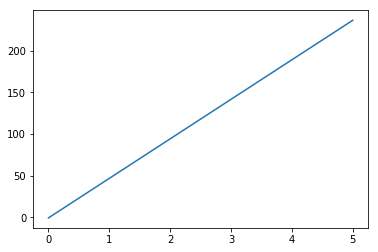

In [355]:
plot_feature(w, range_min=0, range_max=5)

## 4c

In [328]:
for i in range(0,13):

    feature_cols = [i]
    target_col = [13]
    w, MSE_train, MSE_test = train(data, 1.0/3.0, feature_cols, target_col, num_models=2000)
    
    print "For feature ", i
    print " w: ", w
    print " MSE Train: ", MSE_train, " MSE_test: ", MSE_test

For feature  0
 w:  [[-0.43635127]
 [24.49071866]]
 MSE Train:  95.90715586091522  MSE_test:  100.54397073871515
For feature  1
 w:  [[ 0.14608876]
 [21.26008077]]
 MSE Train:  96.50852160043262  MSE_test:  92.91115103119463
For feature  2
 w:  [[-0.61474152]
 [29.34160439]]
 MSE Train:  101.37132184130755  MSE_test:  99.28896402702922
For feature  3
 w:  [[ 4.7727707]
 [22.6022293]]
 MSE Train:  83.06181816442259  MSE_test:  90.41554286662492
For feature  4
 w:  [[-33.84376916]
 [ 41.52067001]]
 MSE Train:  98.13784838695584  MSE_test:  96.6081390472634
For feature  5
 w:  [[  8.79150501]
 [-32.65257247]]
 MSE Train:  123.98727262193042  MSE_test:  125.23923246780183
For feature  6
 w:  [[-0.12625113]
 [31.32918818]]
 MSE Train:  99.4551921819668  MSE_test:  92.53312958153279
For feature  7
 w:  [[ 1.16303936]
 [17.21150168]]
 MSE Train:  88.4419775945756  MSE_test:  89.97452051237059
For feature  8
 w:  [[-0.44305315]
 [26.77115891]]
 MSE Train:  94.49308493027578  MSE_test:  102.611